In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'meshmesh'

In [4]:
os.listdir(data_dir)

['m125m', 'm155m']

In [5]:
#image_exts = ['jpeg', 'jpg','bmp','png']

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [7]:
#tf.keras.preprocessing.image_dataset_from_directory??

In [31]:
data = tf.keras.preprocessing.image_dataset_from_directory(directory ='meshmesh', image_size = (148,148), seed = 101)

Found 730 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
data_iterator

In [34]:
batch = data_iterator.next()

In [35]:
len(batch)

2

In [36]:
batch[0].shape

(32, 148, 148, 3)

In [37]:
#class 0 = mesh125
#class 1 = mesh155
batch[1]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0])

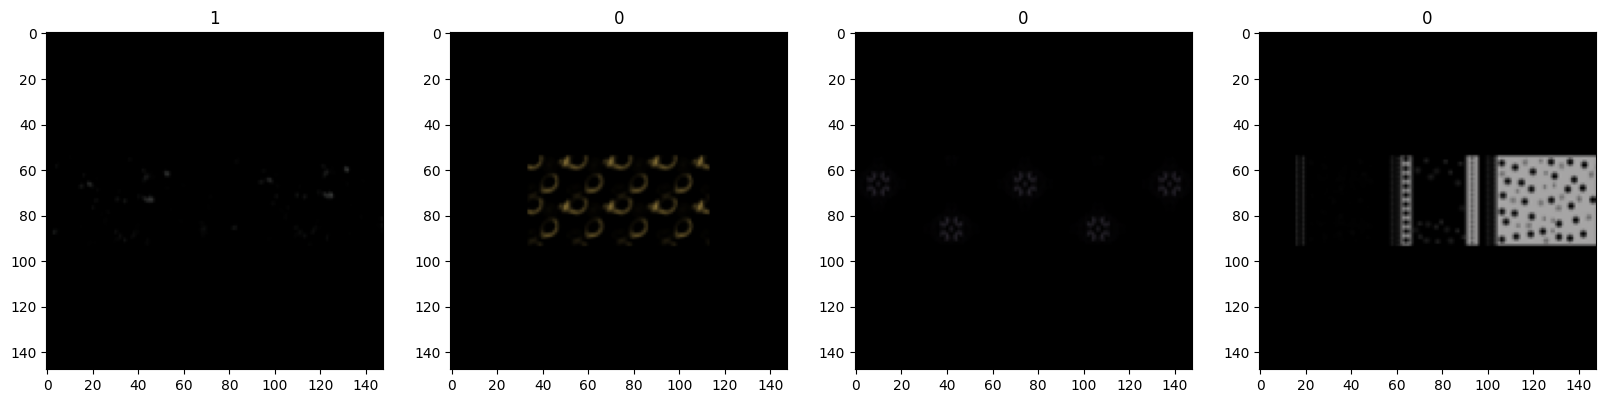

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

In [39]:
scaled = batch[0] / 255

In [40]:
scaled.max()

0.93333334

In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
scaled_iterator = data.as_numpy_iterator()

In [43]:
batch = scaled_iterator.next()

In [44]:
batch[0].min()

0.0

In [45]:
batch[0].max()

0.95070237

In [46]:
len(data)

23

In [47]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [48]:
train_size

18

In [49]:
val_size

2

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

In [52]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size =(3,3), input_shape = (148,148,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size =(3,3), input_shape = (148,148,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size =(3,3), input_shape = (148,148,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(3,3)))


model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 64)        0

In [54]:
logdir = 'logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train,epochs=40,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
18/18 [==============================] - 13s 672ms/step - loss: 0.7027 - accuracy: 0.5330 - val_loss: 0.6729 - val_accuracy: 0.7031
Epoch 2/40
18/18 [==============================] - 12s 643ms/step - loss: 0.6837 - accuracy: 0.5833 - val_loss: 0.6993 - val_accuracy: 0.5312
Epoch 3/40
18/18 [==============================] - 12s 676ms/step - loss: 0.6871 - accuracy: 0.5677 - val_loss: 0.6797 - val_accuracy: 0.5625
Epoch 4/40
18/18 [==============================] - 14s 766ms/step - loss: 0.6712 - accuracy: 0.6076 - val_loss: 0.6477 - val_accuracy: 0.5938
Epoch 5/40
18/18 [==============================] - 15s 817ms/step - loss: 0.6662 - accuracy: 0.5677 - val_loss: 0.6437 - val_accuracy: 0.6562
Epoch 6/40
18/18 [==============================] - 15s 825ms/step - loss: 0.6447 - accuracy: 0.6476 - val_loss: 0.6753 - val_accuracy: 0.5312
Epoch 7/40
18/18 [==============================] - 13s 706ms/step - loss: 0.6621 - accuracy: 0.6146 - val_loss: 0.6076 - val_accuracy: 0.6250

In [57]:
hist.history

{'loss': [0.7026737332344055,
  0.6836751103401184,
  0.6871421933174133,
  0.6712431311607361,
  0.6661502122879028,
  0.644672155380249,
  0.6620514392852783,
  0.6706029772758484,
  0.6471443772315979,
  0.6321509480476379,
  0.6226742267608643,
  0.5803824067115784,
  0.5544944405555725,
  0.5069301724433899,
  0.4845286011695862,
  0.45590436458587646,
  0.45534345507621765,
  0.38890019059181213,
  0.34428709745407104,
  0.3223952054977417,
  0.2890480160713196,
  0.2776263356208801,
  0.2724129855632782,
  0.20647762715816498,
  0.2010466754436493,
  0.18770001828670502,
  0.18509194254875183,
  0.15076756477355957,
  0.15405845642089844,
  0.16268879175186157,
  0.18082195520401,
  0.14370672404766083,
  0.10853126645088196,
  0.10478861629962921,
  0.11533001065254211,
  0.1419866383075714,
  0.11496000736951828,
  0.10163180530071259,
  0.08049657940864563,
  0.09762360155582428],
 'accuracy': [0.5329861044883728,
  0.5833333134651184,
  0.5677083134651184,
  0.60763889551162

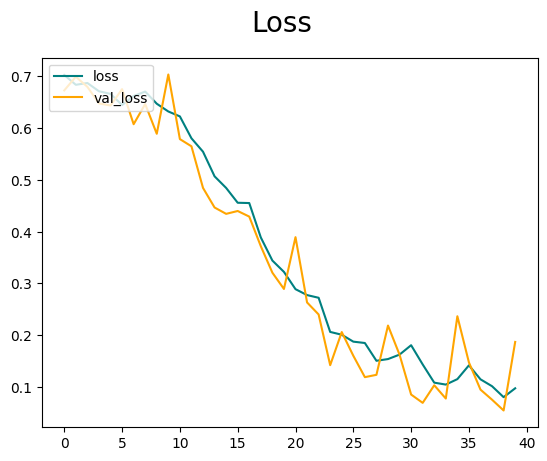

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

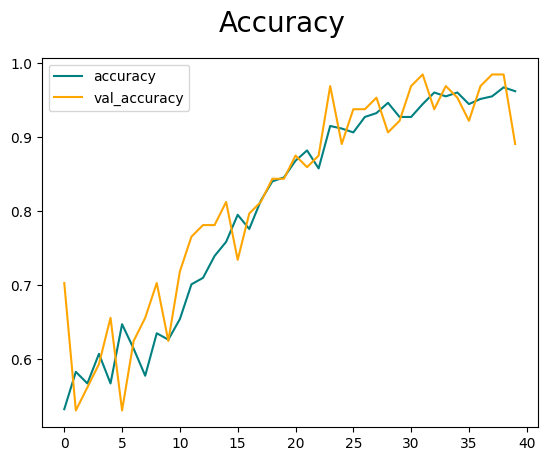

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import classification_report, confusion_matrix

In [62]:

for batch in test.as_numpy_iterator():
    X, y = batch
 


In [63]:
#print(classification_report(test_image_gen.classes, predictions))
y_pred = model.predict(X)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y, y_pred_classes))

1/1 [==============================] - 0s 264ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.89      1.00      0.94        16

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [64]:
img = cv2.imread('resized_img.png')

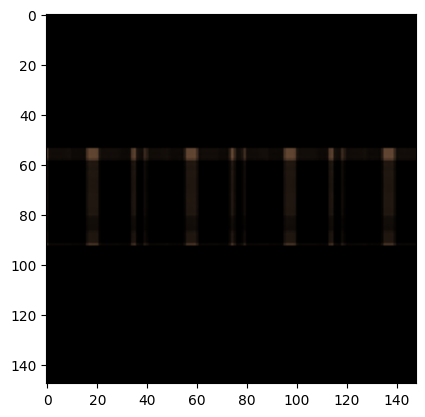

In [65]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

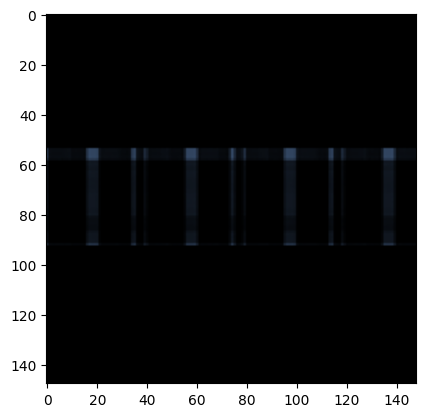

In [66]:
resize = tf.image.resize(img, (148,148))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0 ))

1/1 [==============================] - 0s 84ms/step


In [68]:
#yhat

In [69]:
# Önce görüntüyü normalize edin ve yeniden boyutlandırın
normalized_resized_image = resize/255  # Örneğin, 0 ile 255 arasındaki piksel değerlerini [0, 1] aralığına normalize ediyoruz
input_image = np.expand_dims(normalized_resized_image, 0)  # Girişi tek bir örnek olarak ekliyoruz

# Şimdi modelinize tahmin yaptırabilirsiniz
yhat = model.predict(input_image)

# Tahmin edilen sınıfı alın
predicted_class = np.argmax(yhat)

# Tahmin edilen sınıfın indeksini ve en yüksek olasılığı ekrana yazdırın
print(f"Predicted Class Index: {predicted_class}")
print(f"Highest Probability: {yhat[0, predicted_class]}")

#class 0 = mesh125
#class 1 = mesh155
#class 2 = mmesh80

# Eğer sınıf etiketleriniz varsa, sınıf etiketini de alabilirsiniz
class_labels = ["Class 0: mesh125", "Class 1: mesh155", "Class 2: mesh80"]  # Örnek sınıf etiketleri
predicted_class_label = class_labels[predicted_class]
print(yhat)
print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 26ms/step
Predicted Class Index: 1
Highest Probability: 0.9994465708732605
[[5.534297e-04 9.994466e-01]]
Predicted Class: Class 1: mesh155


In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('models','mesh125155_40_cropped.h5'))

C:\Users\arge04\jupyternotebok\jupyternotebok\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
new_model = load_model(os.path.join('models','mesh_40_cropped.h5'))

In [73]:
new_model

In [74]:
#yhatnew = new_model.predict(np.expand_dims(resize/255,0))

In [75]:
# Önce görüntüyü normalize edin ve yeniden boyutlandırın
normalized_resized_image1 = resize/255  # Örneğin, 0 ile 255 arasındaki piksel değerlerini [0, 1] aralığına normalize ediyoruz
input_image = np.expand_dims(normalized_resized_image1, 0)  # Girişi tek bir örnek olarak ekliyoruz

# Şimdi modelinize tahmin yaptırabilirsiniz
yhat_new = model.predict(input_image)

# Tahmin edilen sınıfı alın
predicted_class = np.argmax(yhat)

# Tahmin edilen sınıfın indeksini ve en yüksek olasılığı ekrana yazdırın
print(f"Predicted Class Index: {predicted_class}")
print(f"Highest Probability: {yhat[0, predicted_class]}")

#class 0 = mesh125
#class 1 = mesh155
#class 2 = mmesh80

# Eğer sınıf etiketleriniz varsa, sınıf etiketini de alabilirsiniz
class_labels = ["Class 0: mesh125", "Class 1: mesh155", "Class 2: mesh80"]  # Örnek sınıf etiketleri
predicted_class_label = class_labels[predicted_class]
print(f"Predicted Class: {predicted_class_label}")

1/1 [==============================] - 0s 31ms/step
Predicted Class Index: 1
Highest Probability: 0.9994465708732605
Predicted Class: Class 1: mesh155
